In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True)
folder ="../../measurements/free_running_spectra/03_03_2020/"
folder_OLG ="../../measurements/OLG/1_16_2020/"
folder_HVA = "../../measurements/HVASVR_tf/HVACH3_plus_pomona/02_19_2020/"

In [32]:
#input_osc = np.loadtxt(folder + '10kHz_sinusoid_3310AHPsiggen.TXT')
noise_locked = np.loadtxt(folder + 'noise_locked.TXT')
noise_driven = np.loadtxt(folder + 'noise_driven_halfSVR_halfHPSG.TXT')

In [33]:
dbHVA_tot = np.loadtxt(folder_HVA + 'dB.TXT')
phHVA_tot = np.loadtxt(folder_HVA + 'DEG.TXT')

In [34]:
ff = dbHVA_tot[:,0]
aa = 10**(dbHVA_tot[:,1]/20)* np.exp(1j*(phHVA_tot[:,1]/180)*np.pi)

In [35]:
olgdb = np.loadtxt(folder_OLG + 'OLG_AMP.TXT')
olgdeg = np.loadtxt(folder_OLG + 'OLG_PH.TXT')

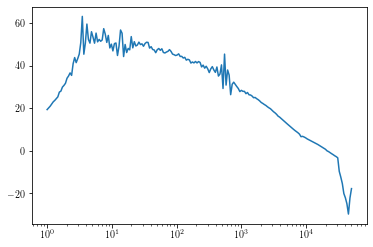

In [36]:
plt.semilogx(olgdb[:,0], olgdb[:,1])

In [37]:
f = olgdb[:,0]
bb = 10**(olgdb[:,1]/20)* np.exp(1j*(olgdeg[:,1]/180)*np.pi)

In [38]:
laserV2Hz = 1e6
a = np.interp(f, ff,aa)
aHzpV = laserV2Hz*a

No handles with labels found to put in legend.
/Users/daniel_vander-hyde/anaconda3/envs/jupy/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


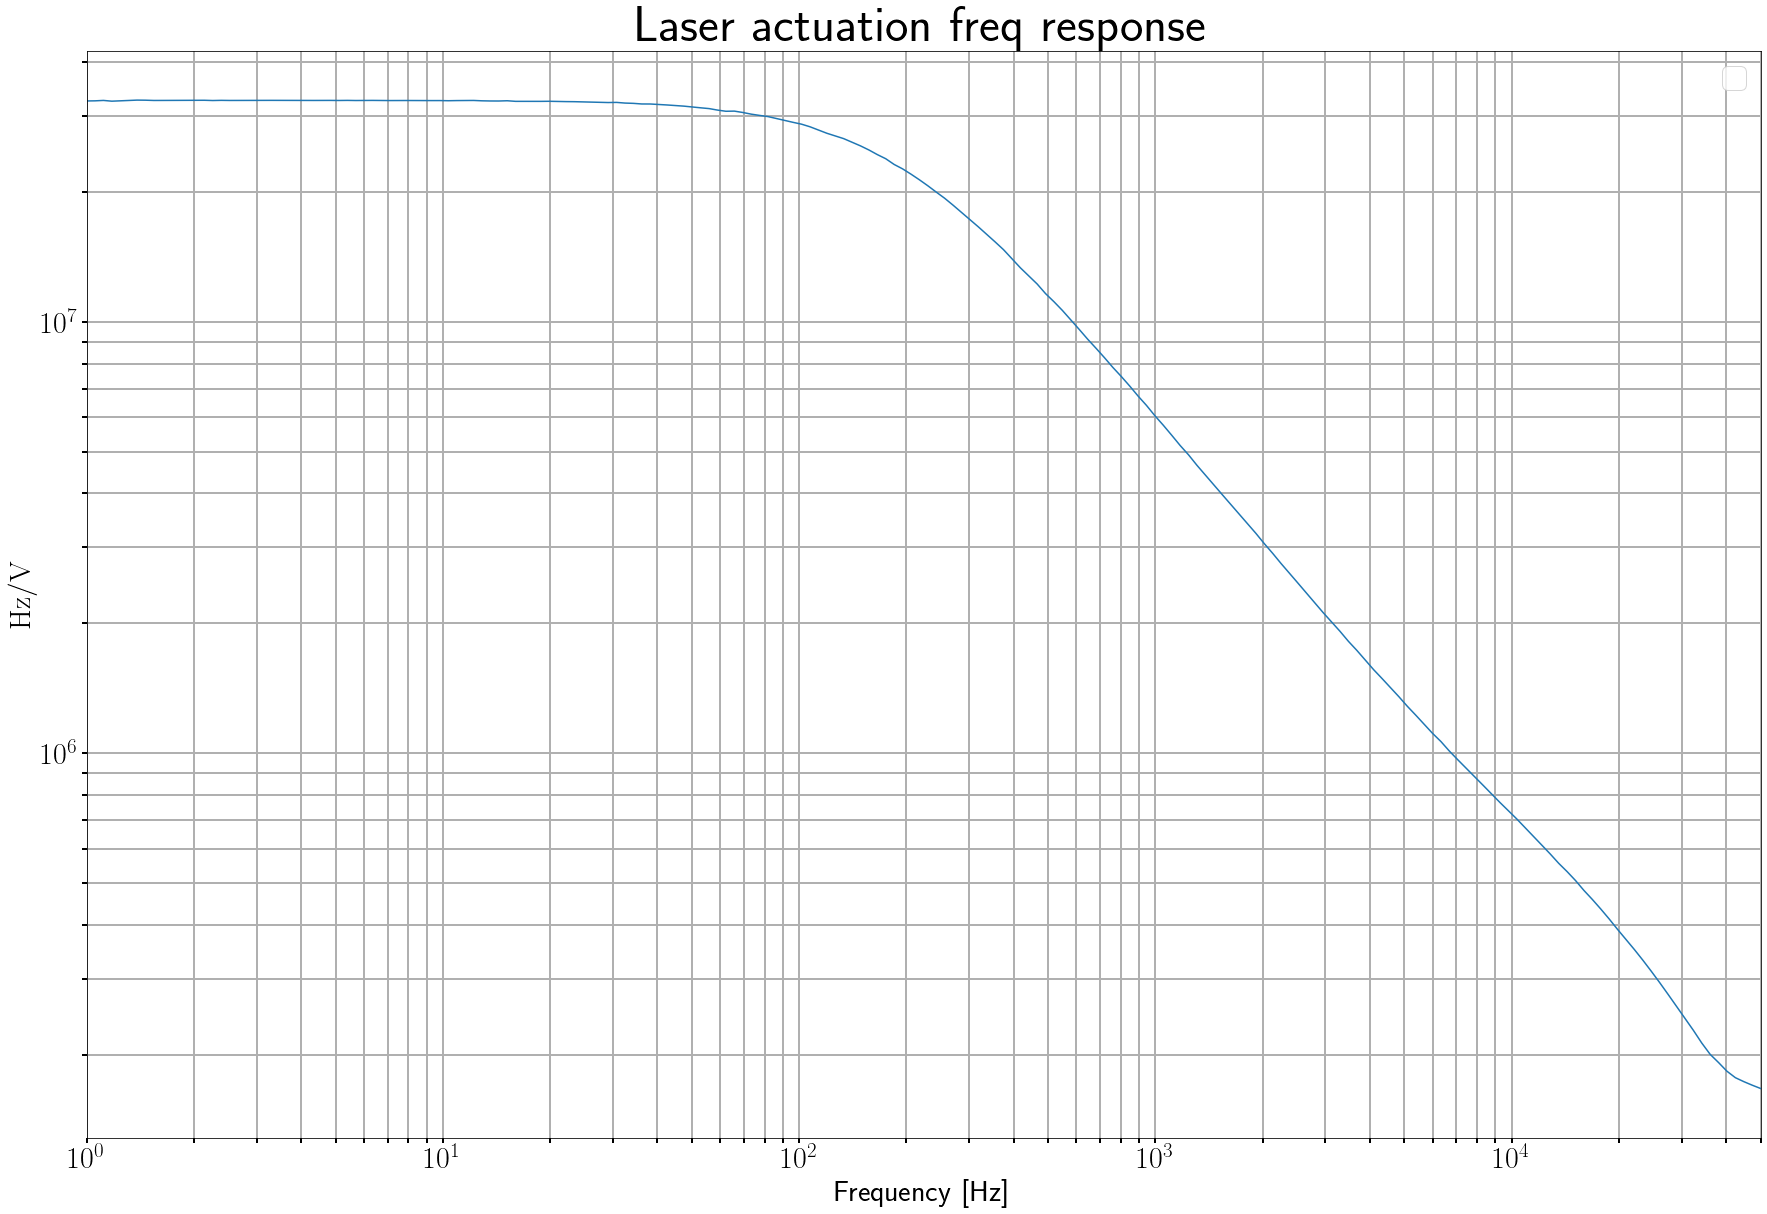

In [39]:
fig = plt.figure(figsize=(30,20))
plt.loglog(f,abs(aHzpV))
plt.xlim([f[0], f[-1]])
plt.legend(fontsize=30)
plt.xlabel('Frequency [Hz]',FontSize=30)
plt.ylabel('$$\mathrm{Hz}/\mathrm{V}$$',FontSize=30)
plt.title("Laser actuation freq response", FontSize=50)
plt.xticks(fontsize=30, rotation=0)
plt.yticks(fontsize=30, rotation=0)
plt.grid(b=None, which='both', axis='both',linewidth=2)
ax = plt.axes()
ax.tick_params(axis='both', which='both',length=5,width=2)

*  What I wish to compute is a Hz/V calibration function based on the measurements I have made (since I can't assume that the laser's actuation will be as perfect as the above figure reports)
* To understand how to compute the displacement noise, you must understand where the measured voltage noise arises from.
* This measured voltage noise is assumed to be a byproduct of the noise coupling into the cavity's sensing of displacement.
* This means that if the cavity were not in a loop what we would measure would be the noise times the sensing function
* Thereafter we the noise adds on as a infinite number of terms which are a multiple of this noise times the sensing function as well as varying degrees of the open loop gain (OLG). 
* The infinite series represents the closed loop gain characteristics of the loop and to retrieve the value of the measurment, we multiply it by the sensing function times the noise
* BUT we don't have a good measurment of the sensing function :/ but ALAS! we have an expression of the sensing function in terms of the open loop gain divided by the actuation function
* This then allows us to have an expression of the Hz/V calibration by flipping the prefactor to the coupled noise which should give us a laser frequency noise if multiplied by our voltage measurement

In [40]:
OLG = bb
CLG = 1/(1-OLG)
CAL_=OLG*CLG
CALVpHz=CAL_/aHzpV
CALHzpV = aHzpV/CAL_

No handles with labels found to put in legend.
/Users/daniel_vander-hyde/anaconda3/envs/jupy/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


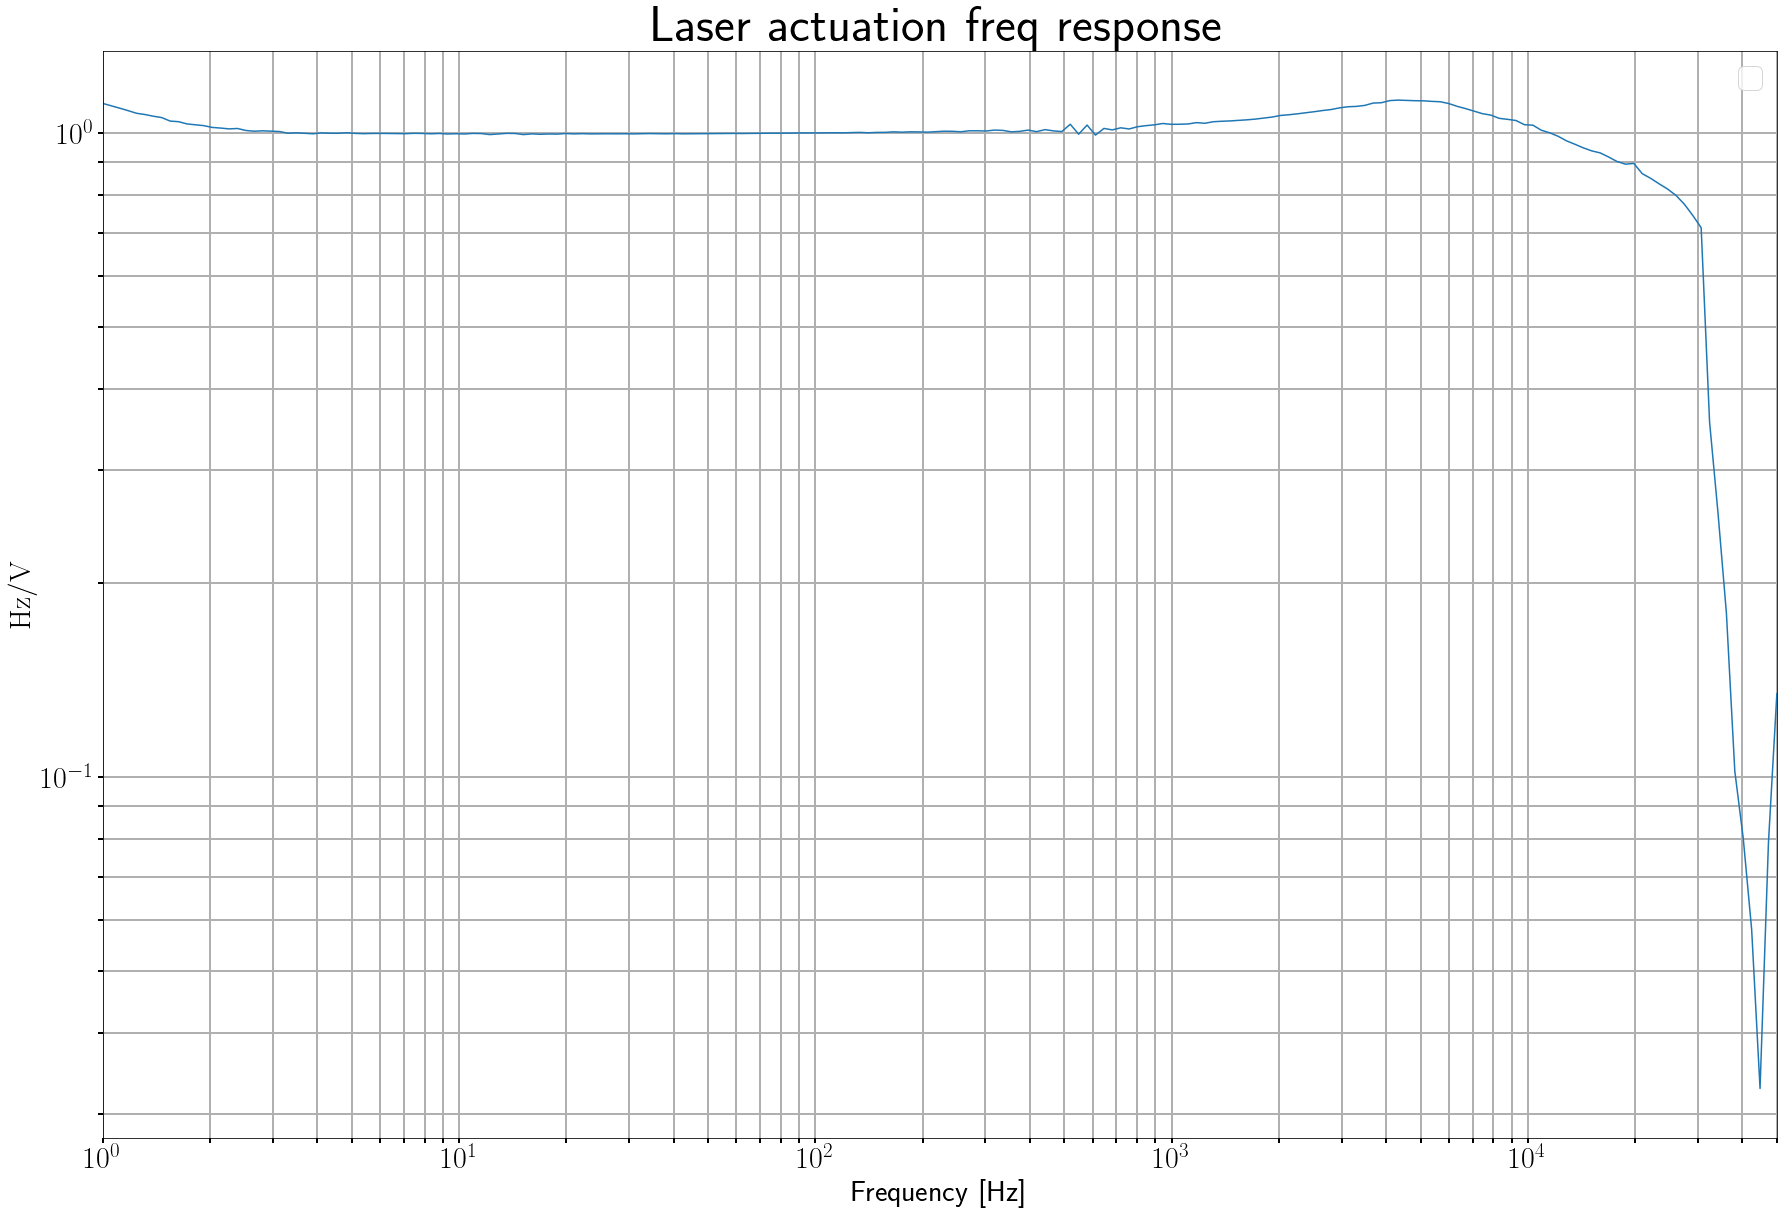

In [41]:
fig = plt.figure(figsize=(30,20))
plt.loglog(f,abs(CAL_))
plt.xlim([f[0], f[-1]])
plt.legend(fontsize=30)
plt.xlabel('Frequency [Hz]',FontSize=30)
plt.ylabel('$$\mathrm{Hz}/\mathrm{V}$$',FontSize=30)
plt.title("Laser actuation freq response", FontSize=50)
plt.xticks(fontsize=30, rotation=0)
plt.yticks(fontsize=30, rotation=0)
plt.grid(b=None, which='both', axis='both',linewidth=2)
ax = plt.axes()
ax.tick_params(axis='both', which='both',length=5,width=2)

In [58]:
nmeas = noise_locked
nmeas2 = noise_driven

In [59]:
fff = nmeas[:,0]
n = nmeas[:,1]
n2 = nmeas2[:,1]

In [60]:
cal = np.interp(fff,f, CALHzpV)
nHz = abs(n*cal)
nHz2 = abs(n2*cal)

In [61]:
c = 299792458
lamb =1.064e-6
nu = c/lamb
Lcav = 0.165

No handles with labels found to put in legend.
/Users/daniel_vander-hyde/anaconda3/envs/jupy/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


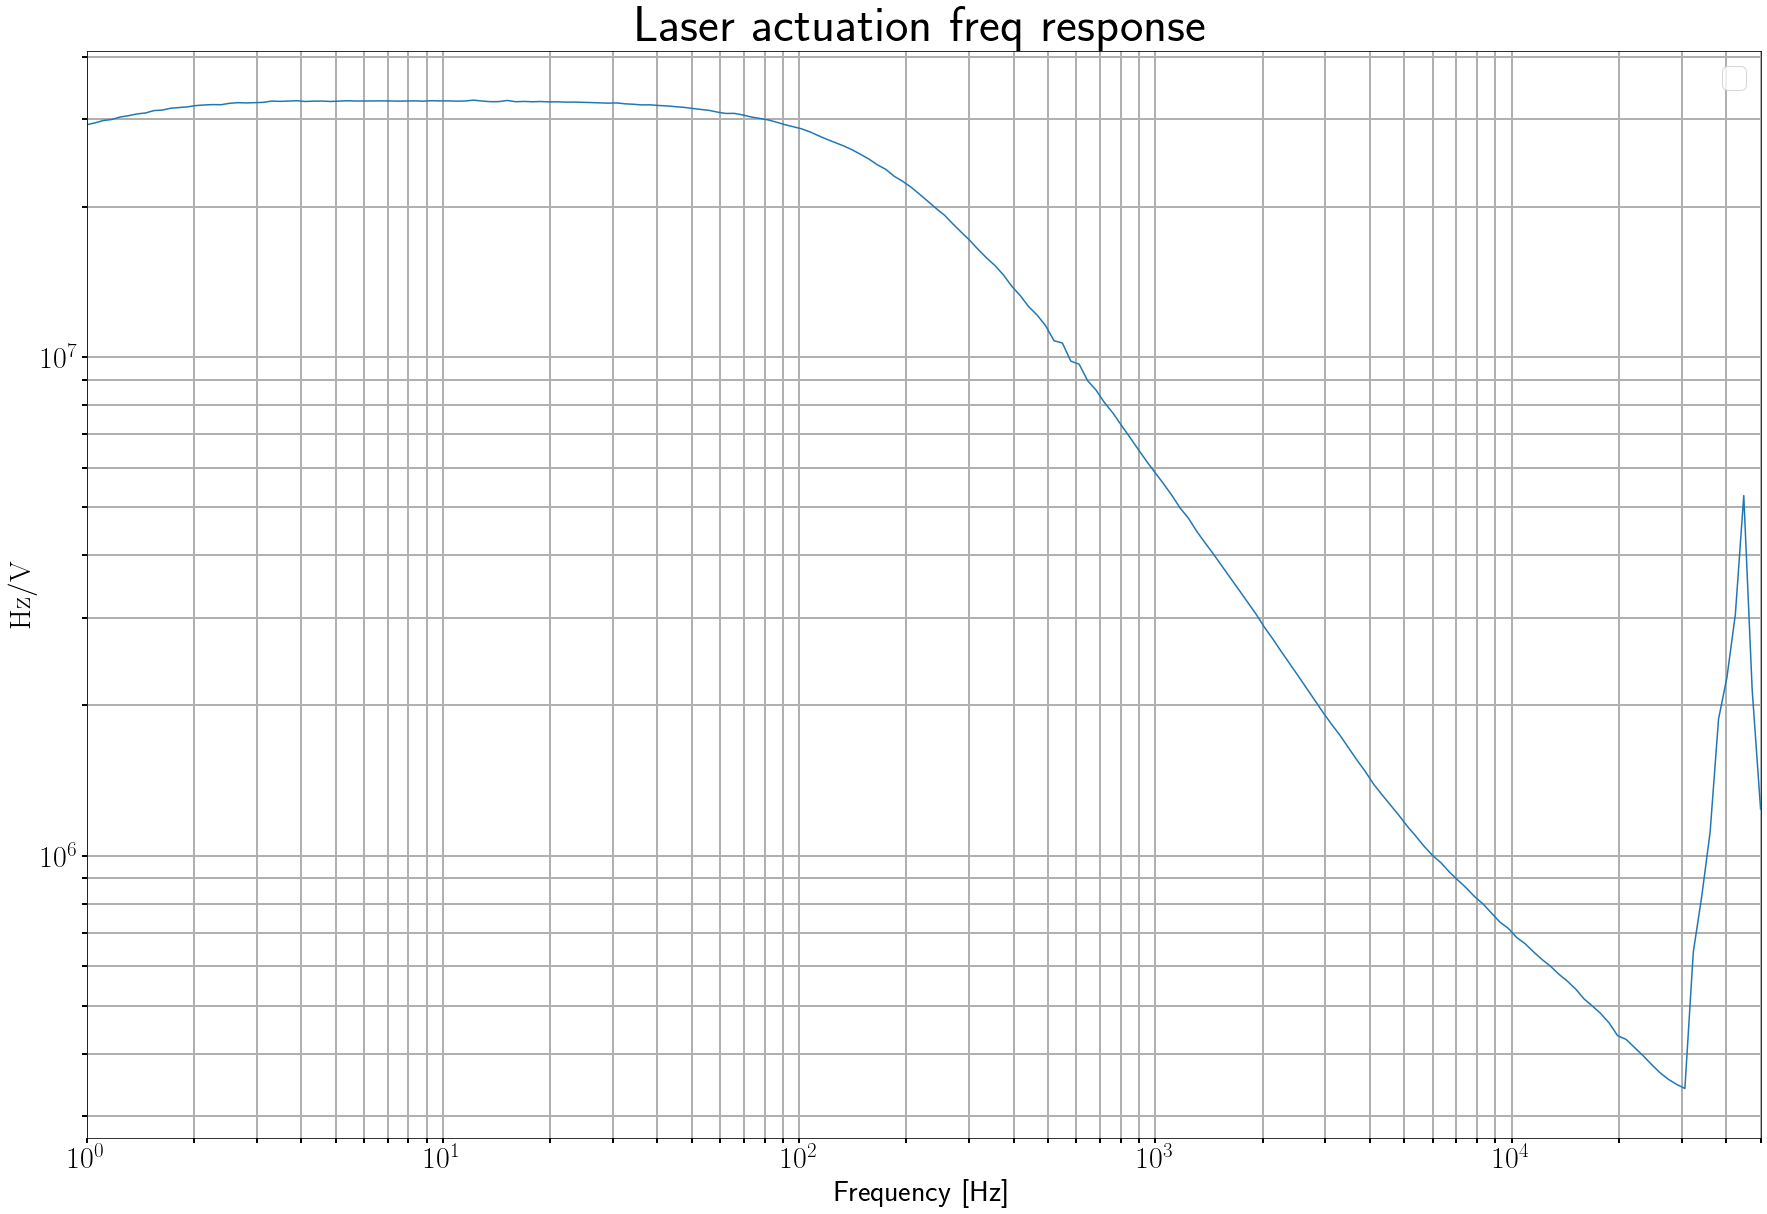

In [62]:
fig = plt.figure(figsize=(30,20))
plt.loglog(f,abs(CALHzpV))
plt.xlim([f[0], f[-1]])
plt.legend(fontsize=30)
plt.xlabel('Frequency [Hz]',FontSize=30)
plt.ylabel('$$\mathrm{Hz}/\mathrm{V}$$',FontSize=30)
plt.title("Laser actuation freq response", FontSize=50)
plt.xticks(fontsize=30, rotation=0)
plt.yticks(fontsize=30, rotation=0)
plt.grid(b=None, which='both', axis='both',linewidth=2)
ax = plt.axes()
ax.tick_params(axis='both', which='both',length=5,width=2)

No handles with labels found to put in legend.
/Users/daniel_vander-hyde/anaconda3/envs/jupy/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


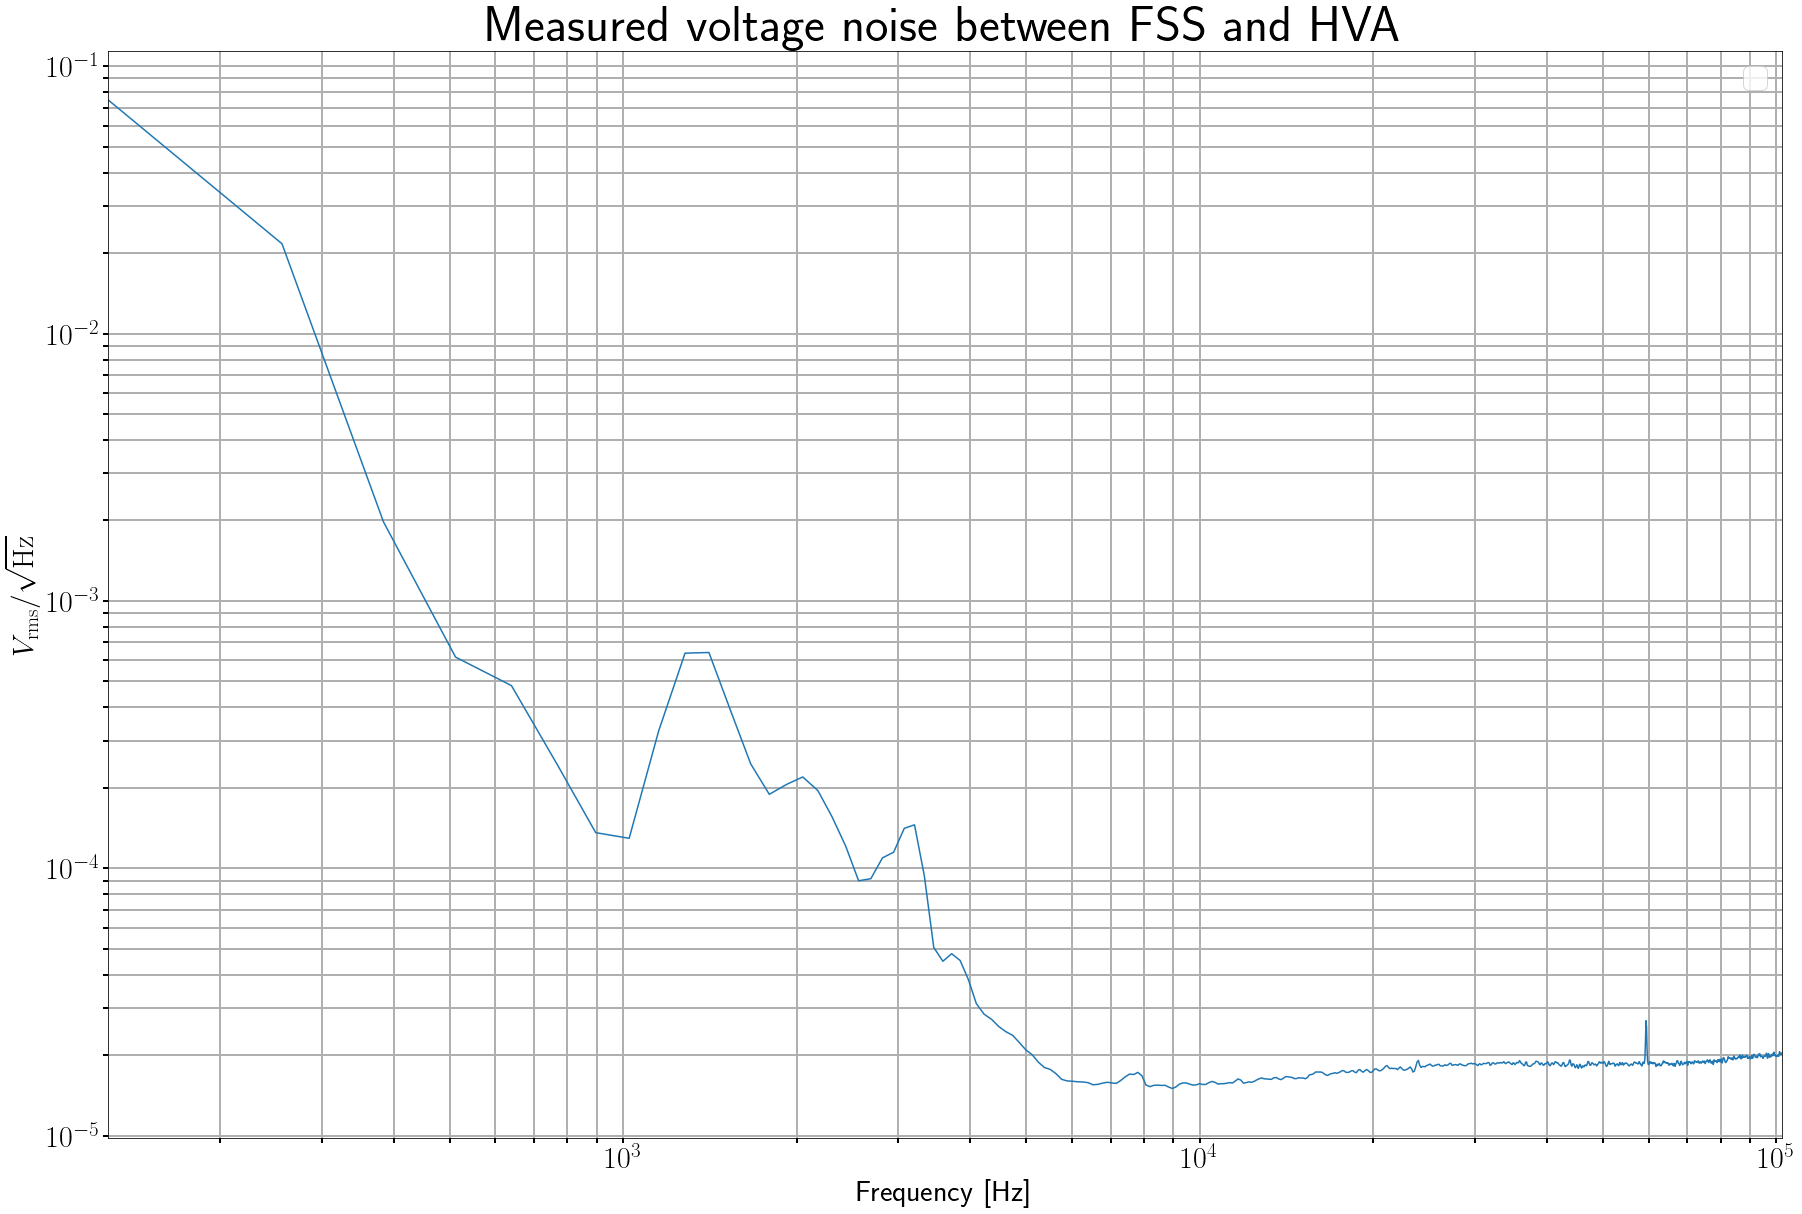

In [63]:
fig = plt.figure(figsize=(30,20))
plt.loglog(fff,n2)
plt.xlim([fff[0], fff[-1]])
plt.legend(fontsize=30)
plt.xlabel('Frequency [Hz]',FontSize=30)
plt.ylabel('$$V_{\mathrm{rms}}/\sqrt{\mathrm{Hz}}$$',FontSize=30)
plt.title("Measured voltage noise between FSS and HVA", FontSize=50)
plt.xticks(fontsize=30, rotation=0)
plt.yticks(fontsize=30, rotation=0)
plt.grid(b=None, which='both', axis='both',linewidth=2)
ax = plt.axes()
ax.tick_params(axis='both', which='both',length=5,width=2)

No handles with labels found to put in legend.
/Users/daniel_vander-hyde/anaconda3/envs/jupy/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


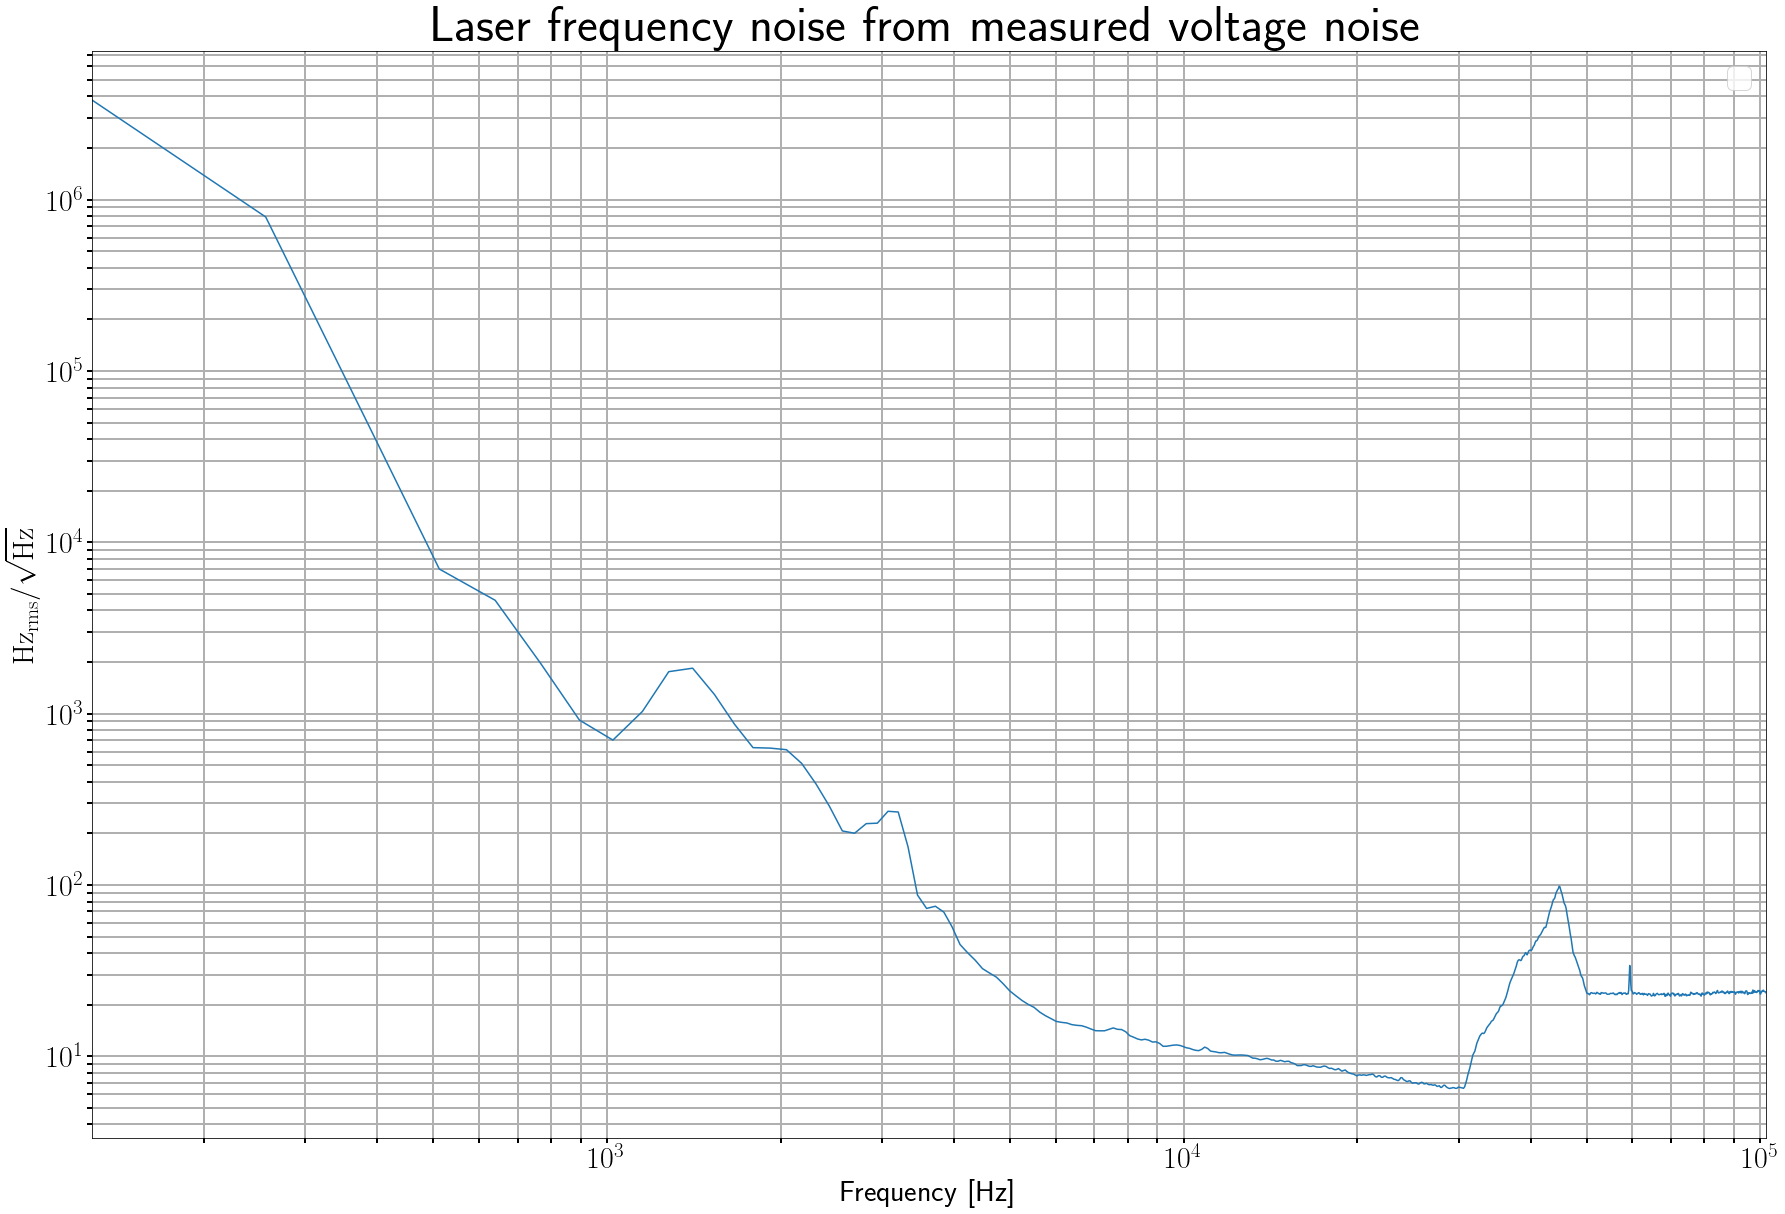

In [64]:
fig = plt.figure(figsize=(30,20))
plt.loglog(fff,nHz)
plt.xlim([fff[0], fff[-1]])
plt.legend(fontsize=30)
plt.xlabel('Frequency [Hz]',FontSize=30)
plt.ylabel('$$\mathrm{Hz}_\mathrm{rms}/\sqrt{\mathrm{Hz}}$$',FontSize=30)
plt.title("Laser frequency noise from measured voltage noise", FontSize=50)
plt.xticks(fontsize=30, rotation=0)
plt.yticks(fontsize=30, rotation=0)
plt.grid(b=None, which='both', axis='both',linewidth=2)
ax = plt.axes()
ax.tick_params(axis='both', which='both',length=5,width=2)

/Users/daniel_vander-hyde/anaconda3/envs/jupy/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


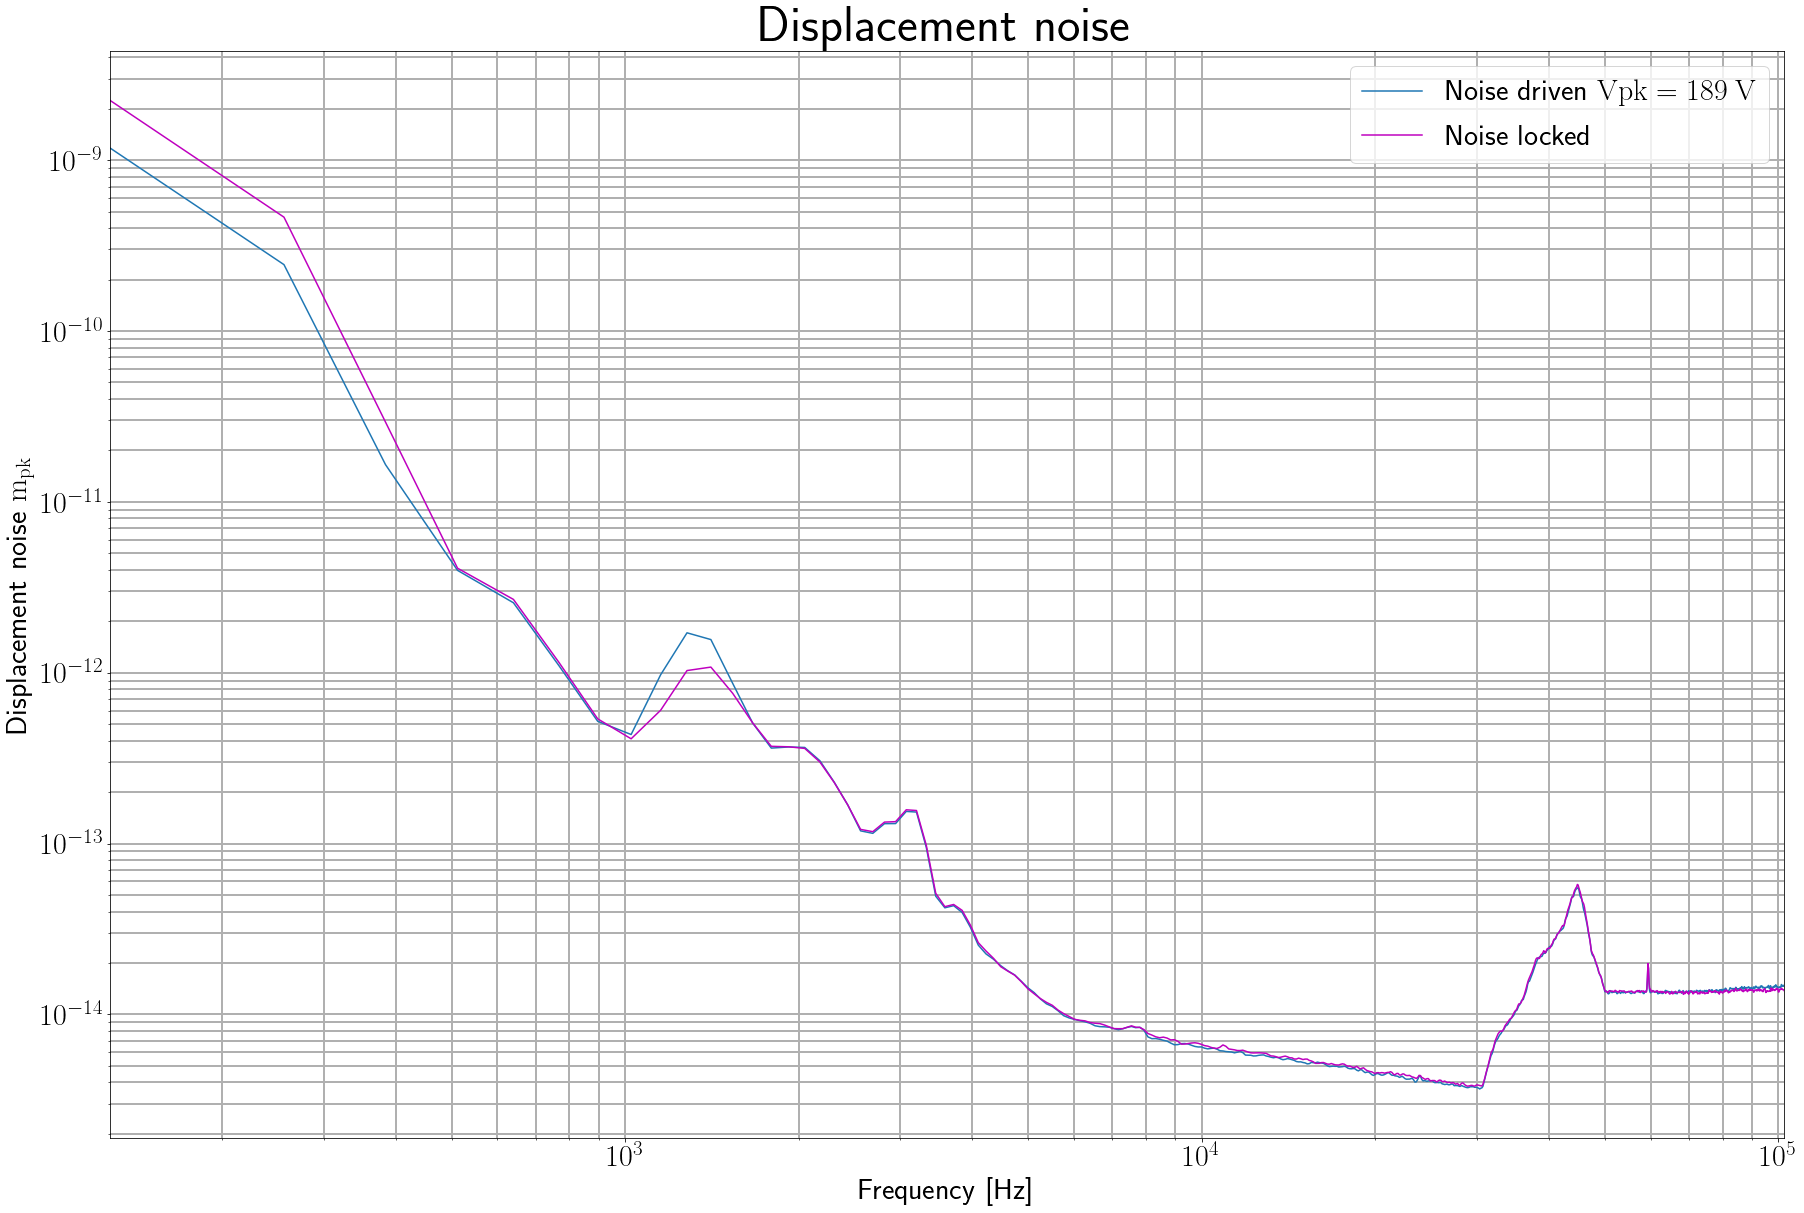

In [65]:
fig = plt.figure(figsize=(30,20))
plt.loglog(fff,nHz2*Lcav/nu, label='Noise driven $\mathrm{Vpk} = 189\;\mathrm{V}$')
plt.loglog(fff,nHz*Lcav/nu,color='m',label='Noise locked')
plt.xlim([fff[0], fff[-1]])
plt.legend(fontsize=30)
plt.xlabel('Frequency [Hz]',FontSize=30)
plt.ylabel('Displacement noise $\mathrm{m}_\mathrm{pk}$',FontSize=30)
plt.title("Displacement noise", FontSize=50)
plt.xticks(fontsize=30, rotation=0)
plt.yticks(fontsize=30, rotation=0)
plt.grid(b=None, which='both', axis='both',linewidth=2)
ax = plt.axes()
plt.savefig('preliminary_displacement_noise_floor_driven.png',dpi=300,bbox_inches='tight')

In [66]:
disp = nHz2*Lcav/nu

In [67]:
disp[78]

6.341712764789013e-15

In [68]:
fff[78]

10112.0

No handles with labels found to put in legend.
/Users/daniel_vander-hyde/anaconda3/envs/jupy/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


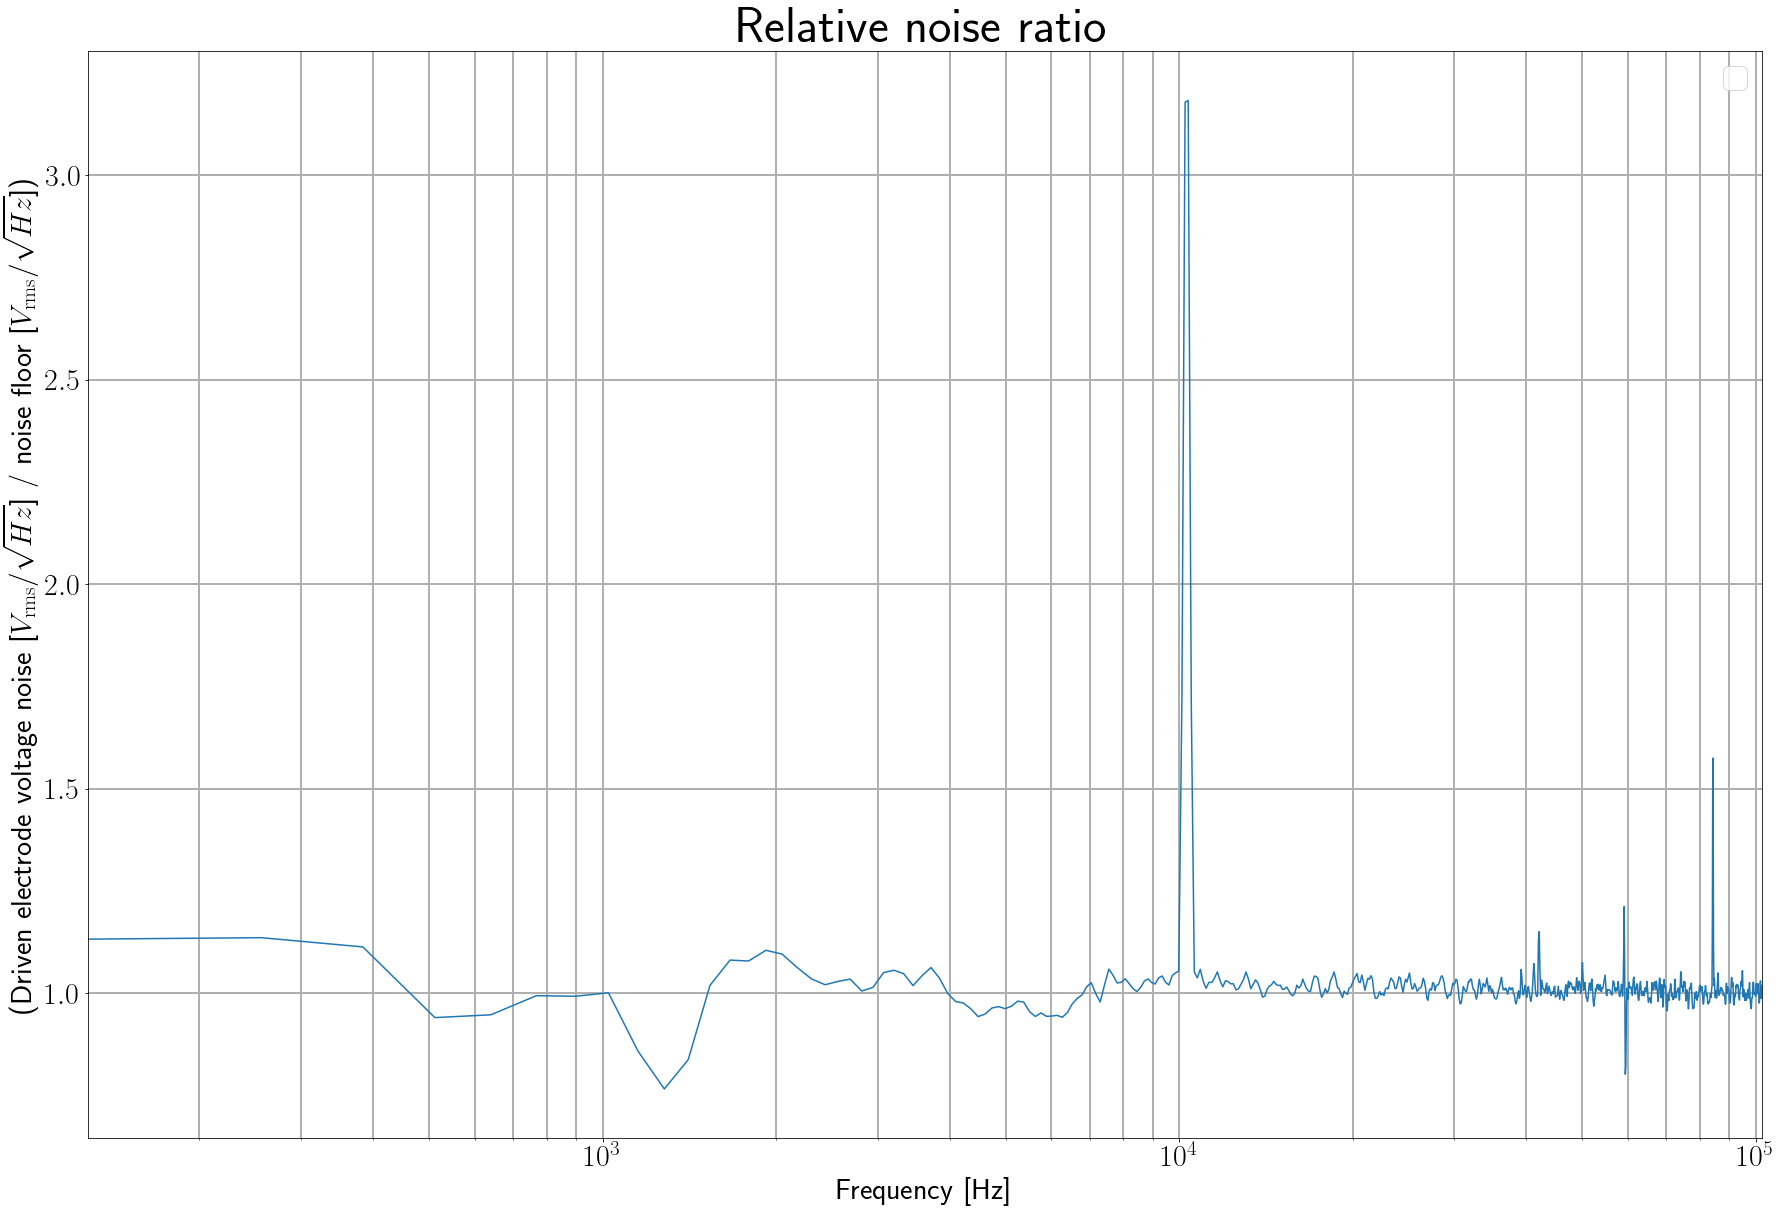

In [22]:
fig = plt.figure(figsize=(30,20))
plt.semilogx(fff,nHz/nHz2)
plt.xlim([fff[0], fff[-1]])
plt.legend(fontsize=30)
plt.xlabel('Frequency [Hz]',FontSize=30)
plt.ylabel('(Driven electrode voltage noise [$V_\mathrm{rms}/\sqrt{Hz}$] / noise floor [$V_\mathrm{rms}/\sqrt{Hz}$])',FontSize=30)
plt.title("Relative noise ratio", FontSize=50)
plt.xticks(fontsize=30, rotation=0)
plt.yticks(fontsize=30, rotation=0)
plt.grid(b=None, which='both', axis='both',linewidth=2)
ax = plt.axes()
plt.savefig('noise_ratio.png',dpi=300,bbox_inches='tight')